In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")

In [4]:
df_true["label"] = 1
df_fake["label"] = 0
df = pd.concat([df_true, df_fake], ignore_index=True)

In [5]:
print(df.shape)
print(df["label"].value_counts())
print(df.head(3))

(44898, 5)
label
0    23481
1    21417
Name: count, dtype: int64
                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   

                 date  label  
0  December 31, 2017       1  
1  December 29, 2017       1  
2  December 31, 2017       1  


In [6]:
try:
    df_true = pd.read_csv("True.csv")
    df_fake = pd.read_csv("Fake.csv")
except FileNotFoundError:
    raise FileNotFoundError(
        "Could not find 'True.csv' or 'Fake.csv' in the working directory.\n"
        "Make sure your notebook/script is in the same folder as those CSVs."
    )

In [7]:
df_true["label"] = 1
df_fake["label"] = 0
df = pd.concat([df_true, df_fake], ignore_index=True)

print("▶ Combined DataFrame shape:", df.shape)
print("▶ Label counts:\n", df["label"].value_counts())
print("\n▶ Sample rows:")
display(df.head(3))

▶ Combined DataFrame shape: (44898, 5)
▶ Label counts:
 label
0    23481
1    21417
Name: count, dtype: int64

▶ Sample rows:


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1


In [8]:
df["full_text"] = df["title"].fillna("") + ". " + df["text"].fillna("")
print("\n▶ Missing values per column:")
print(df.isnull().sum())
df["length"] = df["full_text"].str.split().apply(len)


▶ Missing values per column:
title        0
text         0
subject      0
date         0
label        0
full_text    0
dtype: int64


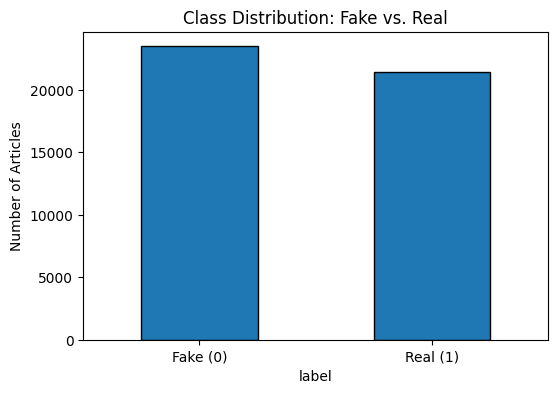

In [9]:
plt.figure(figsize=(6, 4))
df["label"].value_counts().plot(kind="bar", edgecolor="black")
plt.xticks([0, 1], ["Fake (0)", "Real (1)"], rotation=0)
plt.title("Class Distribution: Fake vs. Real")
plt.ylabel("Number of Articles")
plt.show()


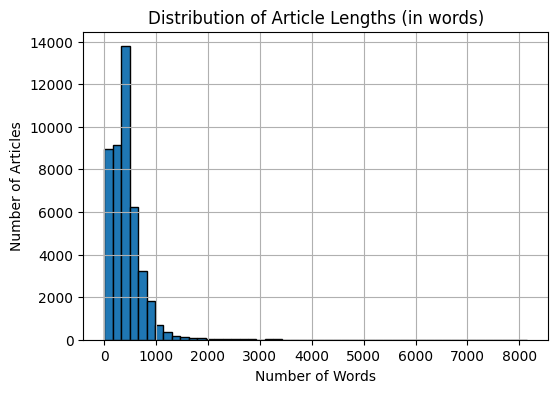

In [10]:
plt.figure(figsize=(6, 4))
df["length"].hist(bins=50, edgecolor="black")
plt.title("Distribution of Article Lengths (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Number of Articles")
plt.show()

In [11]:
vectorizer = CountVectorizer(stop_words="english", max_features=10000)
X_fake = vectorizer.fit_transform(df[df["label"] == 0]["full_text"])
sum_words_fake = X_fake.sum(axis=0)
words_fake = [(word, sum_words_fake[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top10_fake = sorted(words_fake, key=lambda x: x[1], reverse=True)[:10]
print("\n▶ Top 10 words in Fake News:")
display(pd.DataFrame(top10_fake, columns=["word", "frequency"]))


X_real = vectorizer.fit_transform(df[df["label"] == 1]["full_text"])
sum_words_real = X_real.sum(axis=0)
words_real = [(word, sum_words_real[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
top10_real = sorted(words_real, key=lambda x: x[1], reverse=True)[:10]
print("\n▶ Top 10 words in Real News:")
display(pd.DataFrame(top10_real, columns=["word", "frequency"]))


▶ Top 10 words in Fake News:


,word,frequency
0,trump,88638
1,said,33957
2,president,28861
3,people,27085
4,just,21920
5,obama,21379
6,clinton,20311
7,donald,18519
8,like,18491
9,video,16815



▶ Top 10 words in Real News:


,word,frequency
0,said,99076
1,trump,60261
2,reuters,29112
3,president,28698
4,state,21691
5,government,19262
6,house,18089
7,new,17792
8,republican,16879
9,states,16811


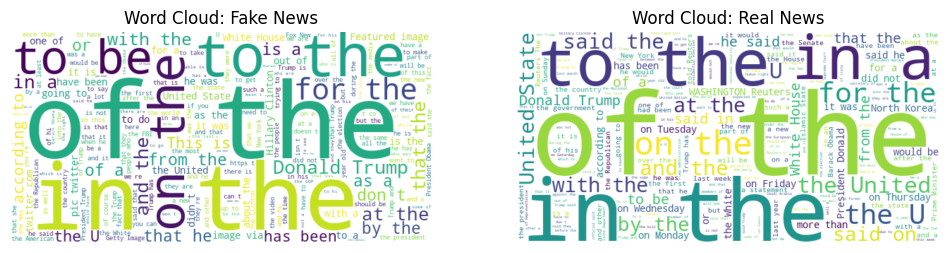

In [12]:
fake_text = " ".join(df[df["label"] == 0]["full_text"].tolist())
real_text = " ".join(df[df["label"] == 1]["full_text"].tolist())

fake_wc = WordCloud(
    width=600, height=300, background_color="white", stopwords="english"
).generate(fake_text)

real_wc = WordCloud(
    width=600, height=300, background_color="white", stopwords="english"
).generate(real_text)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(fake_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Fake News")

plt.subplot(1, 2, 2)
plt.imshow(real_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud: Real News")
plt.show()

In [13]:
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report

In [14]:
df_true = pd.read_csv("True.csv")
df_fake = pd.read_csv("Fake.csv")
df_true["label"] = 1
df_fake["label"] = 0
df = pd.concat([df_true, df_fake], ignore_index=True)
df["full_text"] = df["title"].fillna("") + ". " + df["text"].fillna("")     

In [15]:
X = df["full_text"].values
y = df["label"].values

# train/validation+test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# validation/testing
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

print("Train size:", len(X_train))
print(" Val size:", len(X_val))
print("Test size:", len(X_test))
print("Train label dist:", np.bincount(y_train))
print(" Val label dist:", np.bincount(y_val))
print("Test label dist:", np.bincount(y_test))

Train size: 35918
 Val size: 4490
Test size: 4490
Train label dist: [18785 17133]
 Val label dist: [2348 2142]
Test label dist: [2348 2142]


In [16]:
tfidf = TfidfVectorizer(
    max_features=50_000,
    ngram_range=(1, 2),
    stop_words="english"
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf   = tfidf.transform(X_val)
X_test_tfidf  = tfidf.transform(X_test)

In [17]:
def evaluate_model(model, X_tr, y_tr, X_vl, y_vl, name):
    model.fit(X_tr, y_tr)
    preds = model.predict(X_vl)
    acc = accuracy_score(y_vl, preds)
    p, r, f1, _ = precision_recall_fscore_support(
        y_vl, preds, average="binary", pos_label=1
    )
    print(f"----- {name} -----")
    print(f"Validation accuracy:  {acc:.4f}")
    print(f"Validation Precision: {p:.4f}")
    print(f"Validation Recall:    {r:.4f}")
    print(f"Validation F1:        {f1:.4f}")
    print("Confusion Matrix:\n", confusion_matrix(y_vl, preds))
    print()
    return model

In [18]:
lr = LogisticRegression(max_iter=1000, C=1.0, class_weight="balanced", random_state=42)
lr = evaluate_model(lr, X_train_tfidf, y_train, X_val_tfidf, y_val, "Logistic Regression")

nb = MultinomialNB(alpha=1.0)
nb = evaluate_model(nb, X_train_tfidf, y_train, X_val_tfidf, y_val, "Multinomial NB")

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=20,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)
rf = evaluate_model(rf, X_train_tfidf, y_train, X_val_tfidf, y_val, "Random Forest")

----- Logistic Regression -----
Validation accuracy:  0.9886
Validation Precision: 0.9829
Validation Recall:    0.9935
Validation F1:        0.9882
Confusion Matrix:
 [[2311   37]
 [  14 2128]]

----- Multinomial NB -----
Validation accuracy:  0.9559
Validation Precision: 0.9529
Validation Recall:    0.9547
Validation F1:        0.9538
Confusion Matrix:
 [[2247  101]
 [  97 2045]]

----- Random Forest -----
Validation accuracy:  0.9878
Validation Precision: 0.9793
Validation Recall:    0.9953
Validation F1:        0.9873
Confusion Matrix:
 [[2303   45]
 [  10 2132]]



In [19]:
param_dist = {
    "n_estimators": [100, 300, 500],
    "max_depth": [None, 20, 30, 50],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", 0.5],
    "class_weight": [None, "balanced"]
}

rf_base = RandomForestClassifier(random_state=42, n_jobs=-1)

n_train = X_train_tfidf.shape[0]
n_val   = X_val_tfidf.shape[0]

search = RandomizedSearchCV(
    estimator = rf_base,
    param_distributions = param_dist,
    n_iter = 20,
    scoring = "f1",
    cv = [(
        np.arange(n_train),
        np.arange(n_train, n_train + n_val)
    )],
    random_state = 42,
    verbose = 1
)

import scipy.sparse as sp

X_train_val = sp.vstack([X_train_tfidf, X_val_tfidf])
y_train_val = np.concatenate([y_train, y_val])


search.fit(X_train_val, y_train_val)

print("\n▶ Best parameters found:")
print(search.best_params_)
print("▶ Best validation F1:", search.best_score_)
best_rf = search.best_estimator_
val_preds = best_rf.predict(X_val_tfidf)
acc_val = accuracy_score(y_val, val_preds)
p, r, f1_val, _ = precision_recall_fscore_support(y_val, val_preds, average="binary", pos_label=1)

print(f"\nFinal RF on Validation → accuracy: {acc_val:.4f}, precision: {p:.4f}, recall: {r:.4f}, F1: {f1_val:.4f}")
print("Validation confusion matrix:\n", confusion_matrix(y_val, val_preds))

Fitting 1 folds for each of 20 candidates, totalling 20 fits

▶ Best parameters found:
{'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 0.5, 'max_depth': 50, 'class_weight': 'balanced'}
▶ Best validation F1: 0.9981343283582089

Final RF on Validation → accuracy: 0.9996, precision: 0.9995, recall: 0.9995, F1: 0.9995
Validation confusion matrix:
 [[2347    1]
 [   1 2141]]


In [20]:
chosen = best_rf #best_model
test_preds = chosen.predict(X_test_tfidf)
acc_test = accuracy_score(y_test, test_preds)
report = classification_report(y_test, test_preds, target_names=["Fake", "Real"])
print("=== Final Test Metrics (using chosen model) ===")
print(f"Test accuracy: {acc_test:.4f}")
print(report)

=== Final Test Metrics (using chosen model) ===
Test accuracy: 0.9982
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      2348
        Real       1.00      1.00      1.00      2142

    accuracy                           1.00      4490
   macro avg       1.00      1.00      1.00      4490
weighted avg       1.00      1.00      1.00      4490



In [21]:
from datasets import Dataset, DatasetDict, ClassLabel
train_df = pd.DataFrame({"text": X_train, "label": y_train})
val_df   = pd.DataFrame({"text": X_val,   "label": y_val})
test_df  = pd.DataFrame({"text": X_test,  "label": y_test})

train_ds = Dataset.from_pandas(train_df.reset_index(drop=True))
val_ds   = Dataset.from_pandas(val_df.reset_index(drop=True))
test_ds  = Dataset.from_pandas(test_df.reset_index(drop=True))

features = train_ds.features.copy()
features["label"] = ClassLabel(num_classes=2, names=["fake", "real"])
train_ds = train_ds.cast(features)
val_ds   = val_ds.cast(features)
test_ds  = test_ds.cast(features)

dataset_dict = DatasetDict({
    "train": train_ds,
    "validation": val_ds,
    "test": test_ds
})

print(dataset_dict)

Casting the dataset:   0%|          | 0/35918 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/4490 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/4490 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 35918
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 4490
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 4490
    })
})


In [22]:
from transformers import RobertaTokenizerFast

tokenizer = RobertaTokenizerFast.from_pretrained("roberta-base")

def tokenize_batch(batch):
    return tokenizer(
        batch["text"],
        padding="max_length",
        truncation=True,
        max_length=512
    )

tokenized_datasets = dataset_dict.map(
    tokenize_batch,
    batched=True,
    remove_columns=["text"] 
)

print(tokenized_datasets["train"].column_names)



Map:   0%|          | 0/35918 [00:00<?, ? examples/s]

Map:   0%|          | 0/4490 [00:00<?, ? examples/s]

Map:   0%|          | 0/4490 [00:00<?, ? examples/s]

['label', 'input_ids', 'attention_mask']


In [23]:
from transformers import RobertaForSequenceClassification

model = RobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=2
)


Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
import torch
from transformers import Trainer, TrainingArguments
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def compute_metrics(pred):
    logits, labels = pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, preds)
    p, r, f1, _ = precision_recall_fscore_support(
        labels, preds, average="binary", pos_label=1
    )
    return {"accuracy": acc, "precision": p, "recall": r, "f1": f1}

training_args = TrainingArguments(
    output_dir="fake-vs-real-checkpoints",
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    learning_rate=2e-5,
    weight_decay=0.01,
    eval_strategy="epoch", 
    save_strategy="epoch",
    logging_dir="roberta-logs",
    logging_steps=500,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True
)


trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets["train"],
    eval_dataset=tokenized_datasets["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


C:\Users\youne\AppData\Local\Temp\ipykernel_4544\2559276754.py:32: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [25]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.000100,0.000005,1.000000,1.000000,1.000000,1.000000
2,0.000000,0.000001,1.000000,1.000000,1.000000,1.000000
3,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000


TrainOutput(global_step=13470, training_loss=0.0030615728564590055, metrics={'train_runtime': 5651.7153, 'train_samples_per_second': 19.066, 'train_steps_per_second': 2.383, 'total_flos': 2.835126865926144e+16, 'train_loss': 0.0030615728564590055, 'epoch': 3.0})

In [26]:
test_metrics = trainer.evaluate(tokenized_datasets["test"])
print("\n=== Test Set Metrics ===")
print(f"  Test accuracy:  {test_metrics['eval_accuracy']:.4f}")
print(f"  Test precision: {test_metrics['eval_precision']:.4f}")
print(f"  Test recall:    {test_metrics['eval_recall']:.4f}")
print(f"  Test F1:        {test_metrics['eval_f1']:.4f}")



=== Test Set Metrics ===
  Test accuracy:  1.0000
  Test precision: 1.0000
  Test recall:    1.0000
  Test F1:        1.0000


In [ ]:
output_dir = "fake-vs-real-final"
trainer.save_model(output_dir)
tokenizer.save_pretrained(output_dir)

('roberta-fake-vs-real-final\\tokenizer_config.json',
 'roberta-fake-vs-real-final\\special_tokens_map.json',
 'roberta-fake-vs-real-final\\vocab.json',
 'roberta-fake-vs-real-final\\merges.txt',
 'roberta-fake-vs-real-final\\added_tokens.json',
 'roberta-fake-vs-real-final\\tokenizer.json')

In [ ]:
from transformers import pipeline

classifier = pipeline(
    "text-classification",
    model="fake-vs-real-final",
    tokenizer="fake-vs-real-final",
    return_all_scores=False
)

samples = [
    "BREAKING: NASA confirms water found on Mars. This could change everything!",
    "This is a made-up story. There is no evidence of that.",
    "President signs a new bill to increase funding for sustainable energy."
]

for text in samples:
    result = classifier(text)
    print(text)
    print(" →", result, "\n")


Device set to use cuda:0


BREAKING: NASA confirms water found on Mars. This could change everything!
 → [{'label': 'LABEL_0', 'score': 0.999984622001648}] 

This is a made-up story. There is no evidence of that.
 → [{'label': 'LABEL_0', 'score': 0.9993122816085815}] 

President signs a new bill to increase funding for sustainable energy.
 → [{'label': 'LABEL_0', 'score': 0.9953926801681519}] 



In [68]:
import math
label_map = {"LABEL_0": "fake", "LABEL_1": "real"}

def predict_faketest(text):
    out = classifier(text)[0]
    mapped_label = label_map[out["label"]]
    return { "label": mapped_label, "score": out["score"] }
def chunk_and_predict(text, chunk_size=512):
    encoding = tokenizer(text, return_tensors="pt", truncation=False)
    input_ids = encoding["input_ids"][0]
    n_tokens = input_ids.shape[0]
    n_chunks = math.ceil(n_tokens / chunk_size)
    votes = []
    confidences = []
    for i in range(n_chunks):
        start = i * chunk_size
        end = min((i + 1) * chunk_size, n_tokens)
        token_chunk = input_ids[start:end]
        chunk_text = tokenizer.decode(token_chunk, skip_special_tokens=True)
        out = classifier(chunk_text, truncation=True, max_length=chunk_size)[0]
        label_map = {"LABEL_0": "fake", "LABEL_1": "real"}
        votes.append(label_map[out["label"]])
        confidences.append(out["score"])
    fake_votes = votes.count("fake")
    real_votes = votes.count("real")
    if fake_votes > real_votes:
        return {"label": "fake", "confidence": sum(confidences) / n_chunks}
    elif real_votes > fake_votes:
        return {"label": "real", "confidence": sum(confidences) / n_chunks}
    else:
        return {
            "label": "fake" if confidences[votes.index("fake")] > confidences[votes.index("real")] else "real",
            "confidence": max(confidences)
        }

In [69]:
test_df = test_df.reset_index(drop=True)
samples = test_df.sample(10, random_state=42) 

for idx, row in samples.iterrows():
    text = row["text"]
    true_label = "real" if row["label"] == 1 else "fake"
    predicted = chunk_and_predict(text)
    print(text)
    print(true_label,predicted)
print(chunk_and_predict('''Doha – The Peruvian Congress has forcefully demanded its government to back Morocco’s complete sovereignty over the Sahara, while exposing the dangerous terrorist connections and criminal operations of the Polisario Front – a puppet organization manipulated by the Algerian regime.

In a motion adopted by an overwhelming majority on Monday, the Peruvian legislative body commanded the executive branch to “adopt a position of support to the sovereignty of the Kingdom of Morocco over the Western Sahara,” as stated in the text presented by Congresswoman Carmen Patricia Juarez Gallegos, First Vice-President of the Congress.

The motion hailed ties with Rabat since 1964 and declared Morocco’s autonomy proposal as a “serious solution in conformity with international law.”

Peruvian lawmakers asserted that Morocco’s 2007 initiative “has received the support of numerous countries, among which the United States of America, the Kingdom of Spain and the Republic of France, which have recognized said proposal as the most realistic and viable basis for a lasting solution to the conflict.”

The Congress blasted the Polisario Front for its treacherous alliances with terrorist networks. The motion exposes to the international community “the Polisario’s links with terrorist organizations such as Hezbollah, as well as with networks trafficking arms and persons, and the exploitation of minors in the Tindouf camps.” It demands international bodies to “investigate these crimes and sanction them.”'''))

U.S.-backed militias say they take major Raqqa position from ISIS. BEIRUT (Reuters) - The U.S.-backed Syrian Democratic Forces (SDF) has taken the National Hospital in Raqqa, one of Islamic State s last remaining bastions in its former Syrian capital, a militia spokesman said on Tuesday.  The SDF, an alliance of Kurdish and Arab militias, is now fighting Islamic State in the area around Raqqa stadium, said the spokesman Mostafa Bali in a message.   During these clashes, the National Hospital was liberated and cleared from the Daesh mercenaries, and 22 of these foreign mercenaries were killed there,  said Bali.  The stadium is the last major position held by Islamic State after four months of battle in Raqqa and the departure of some of its fighters under a deal on Sunday, leaving only foreign jihadists.  Islamic State has lost swathes of its territory in Syria and Iraq this year, including its most prized possession Mosul, and in Syria it has been forced back into a strip of the Euphra

In [ ]:
model.save_pretrained("fake-vs-real-final")
tokenizer.save_pretrained("fake-vs-real-final")

('roberta-fake-vs-real-final\\tokenizer_config.json',
 'roberta-fake-vs-real-final\\special_tokens_map.json',
 'roberta-fake-vs-real-final\\vocab.json',
 'roberta-fake-vs-real-final\\merges.txt',
 'roberta-fake-vs-real-final\\added_tokens.json',
 'roberta-fake-vs-real-final\\tokenizer.json')